# **Introduction to Python**
We will mainly work with [NumPy](https://docs.scipy.org/doc/numpy-1.13.0/user/whatisnumpy.html), [Matplotlib](https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), and [SciPy](https://www.scipy.org/getting-started.html) in this introductory course. Additionally, we brielfy present [Scikit-learn](https://scikit-learn.org/stable/) as prominent framework for machine learning algorithms.
As a further important tool of programming, we will briefly introduce [Git](https://git-scm.com/).


**NumPy** is the core library for scientific computing in Python. It provides a high-performance multidimensional array object and tools for working with these arrays.
A **NumPy array** is a grid of values, all of the same type, and is indexed by a tuple of non-negative integers.
- The number of dimensions is the **rank** of the array;
- the shape of an array is a tuple of integers giving the size of the array along each dimension.

**Matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits.

**SciPy** is a free and open-source Python library used for scientific computing and technical computing.
SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

**Scikit-learn*** is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

**Git** is a free and open-source distributed version control system designed to handle everything from small to very large projects with speed and efficiency.

Some basics of these python packages or tools will be addressed in this first notebook. If you are interested, you can visit the respective documentations and get a deeper understanding. Moreover, we will briefly address some basics concepts (i.e., functions and classes) of the programming language Python.

### **Table of Contents**
1. [Common NumPy Operations](#numpy)
2. [Functions and Classes](#functions-and-classes)
3. [Plotting with Matplotlib](#matplotlib)
4. [Optimization with SciPy](#scipy)
5. [Classification with Scikit-learn](#scikit-learn)
6. [Version Control via Git](#git)

In [1]:
import numpy as np 
import pylab as plt
import scipy.optimize

### **1. Common NumPy Operations** <a class="anchor" id="numpy"></a>
This will be a quick introduction to some common operations in NumPy.
For a more detailed notebook using NumPy and Matplotlib refer to https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb.

- Create and print two NumPy arrays `a` and `b` that contain the values of the following vectors:
\begin{equation}
\mathbf{a} =\begin{pmatrix}-2.0 \\ 0.0\end{pmatrix}, \quad \mathbf{b} =\begin{pmatrix}2.0 \\ 1.0\end{pmatrix}.
\end{equation}
- Create a rank 1 array `c` having arbitrary elements.
- Print the type of the array using Pythons' built-in `type` method.
- Print the shape of the array `c`.
- Index all elements from the array (e.g., using `c[.]`) and print them.
- Change the element of the first entry of the array `c`.
- Create a rank 2 array `X` having arbitrary elements (`X` would represent a matrix).
- Print the shape of `X`.
- Index some of elements of `X`  and print them.

In [28]:
# Create array `a`.
a = np.array([-2.0, 0.0])

# Create array `b`.
b = np.array([2.0, 1.0])

# Print arrays `a` and `b`.
print(a)
print(b)

# Create `c` as a rank 1 array with arbitrary elements.
c = np.array([1,2,3,4])

# Print type of array `c`.
print(type(c))

# Print shape of array `c`.
print(c.shape)

# Index and print all elements of array `c`.
for i in range(len(c)):
    print(f"{i}th element of c: {c[i]}")

# Change the first element of array `c`.
c[0] = -c[0]

# Print array `c`.
print(c)

# Create `X` as a rank 2 array with arbitrary elements.
x = np.array([[1,2],[3,4]])

# Print shape of array `X`.
print(x.shape)

# Index and print some elements of array `X`.
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
       print(f"{i},{j}th element of x: {x[i,j]}")


[-2.  0.]
[2. 1.]
<class 'numpy.ndarray'>
(4,)
0th element of c: 1
1th element of c: 2
2th element of c: 3
3th element of c: 4
[ 1  2  3 -4]
(2, 2)
0,0th element of x: 1
0,1th element of x: 2
1,0th element of x: 3
1,1th element of x: 4


Perform the following operations with vectors $\mathbf{a}$ and $\mathbf{b}$:
- scalar Product: $\mathbf{a}^\mathrm{T} \cdot \mathbf{b}$,
- outer Product: $\mathbf{a} \cdot \mathbf{b}^\mathrm{T}$,
- and elementwise multiplication: $\mathbf{c} = \mathbf{a} \odot \mathbf{b}$ where $c_i = a_i \cdot b_i$.

In [61]:
# Compute and print scalar product of `a` and `b`.
scalar = a.T @ b
#scalar = np.dot(a, b)
print(scalar)

# Compute and print outer product of `a` and `b`.
outer = np.outer(a,b)
print(outer)
print(a.reshape(1,-1) @ b.reshape(1,-1).T)

# Compute and print elementwise multiplication of `a` and `b`.
elementwise = a * b
print(elementwise)

4
[[2 1]
 [4 2]]
[[4]]
[2 2]


- Create a numpy array representing the matrix $M \in \mathbb{R}^{2 \times 2}$ with random elements.
- Now perform the following calculation: $\mathbf{M}\mathbf{M}^{-1}$.
    - *Tip*: You can use `A @ B ` (`np.dot(A, B)`, `np.matmul(A, B)`) to perform matrix multiplication.

In [30]:
# Create 2x2 array `M` with random elements.
m = np.array([[1,2],[3,4]])

# Print matrix multiplcation of M and its inverse.
mm = m @ np.linalg.inv(m)
print(mm)

[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


### **2. Functions and Classes** <a class="anchor" id="functions-and-classes"></a>

#### **Functions**
- A function is a block of code (started by `def`) which only runs when it is called.
- You can pass data, known as parameters, into a function.
- A function can return data as a result.

In [31]:
def example_function(a, inc):
    """
    This is a docstring to document your function.
    In particular you should describe the expected 
    parameters and the return value, if available.
    
    Parameters
    ----------
    a : expected data type of parameter `a`
        Description of parameter `a`.
    inc : expected data type of parameter `inc`
        Description of parameter `inc`.
        
    Returns
    -------
    c : data type of returned value `c`
        Description of returned value `c`.
    """
    c = a + inc
    return c

print(example_function("hello", " world"))
print(example_function(100, 20))
print(example_function(a, b))

hello world
120
[0. 1.]


The Euclidean distance of two vectors is defined as:
$$d(\mathbf{a}, \mathbf{b})=\|\mathbf{a}-\mathbf{b}\|_{2}=\sqrt{\left(a_{1}-b_{1}\right)^{2}+\cdots+\left(a_{n}-b_{n}\right)^{2}}=\sqrt{\sum_{i=1}^{n}\left(a_{i}-b_{i}\right)^{2}}.$$

- Implement the function `euc_dist_loop(a, b)` using a [for loop](https://docs.python.org/3/tutorial/controlflow.html). *Note:* To calculate the square root you might use `np.sqrt`.

In [32]:
def euc_dist_loop(a:np.array, b:np.array) -> float:
    """
    Computes the Euclidean distance between the two
    vectors `a` and `b` by using a for loop.
    
    Parameters
    ----------
    a : np.ndarray, shape (n_elements)
        First vector.
    b : np.ndarray, shape (n_elements)
        Second vector.
        
    Returns
    -------
    dist : float
        Euclidean distance between the vectors `a` and `b`.
    """
    if(len(a) != len(b)):
        raise Exception("Lengths are not equal!")
    result = 0
    for i in range(len(a)):
        result += (a[i] - b[i])**2
    return np.sqrt(result)

# Create two vectors `a` and `b`.
a, b = np.array([1, 2]), np.array([2, 1])

# Compute and print Euclidean distance between `a` and `b`.
res = euc_dist_loop(a, b)
print(res)

1.4142135623730951


- Implement the function `euc_sum` which makes use of the NumPy method `np.sum`. You should not use any loops in your solution.

In [62]:
def euc_dist_sum(a:np.array, b:np.array) -> float:
    """
    Computes the Euclidean distance between the two
    vectors `a` and `b` by using the NumPy method 
    `np.sum`.
    
    Parameters
    ----------
    a : np.ndarray, shape (n_elements)
        First vector.
    b : np.ndarray, shape (n_elements)
        Second vector.
        
    Returns
    -------
    dist : float
        Euclidean distance between the vectors `a` and `b`.
    """
    if(len(a) != len(b)):
        raise Exception("Lengths are not equal!")
    return np.sqrt(np.sum((a-b)**2))

# Create two vectors `a` and `b`.
a, b = np.array([1, 2]), np.array([2, 1])

# Compute and print Euclidean distance between `a` and `b`.
res = euc_dist_sum(a, b)
print(res)

1.4142135623730951


- Implement the function `euc_dist_matmul` which makes use of matrix multiplication. Recall that the Euclidean distance can be expressed using a dot product.

In [74]:
def euc_dist_matmul(a:np.array, b:np.array) -> float:
    """
    Computes Euclidean distance between the two
    vectors `a` and `b` by using NumPy matrix
    multiplication.
    
    Parameters
    ----------
    a : np.ndarray, shape (n_elements)
        First vector.
    b : np.ndarray, shape (n_elements)
        Second vector.
        
    Returns
    -------
    dist : float
        Euclidean distance between the vectors `a` and `b`.
    """
    if(len(a) != len(b)):
        raise Exception("Lengths are not equal!")
    return np.sqrt(np.dot(a-b, a-b))#weil dot ja a.T @ b == np.dot(a,b) ist 

# Create two vectors `a` and `b`.
a, b = np.array([7, 4]), np.array([2, 7])

# Compute and print Euclidean distance between `a` and `b`.
res = euc_dist_matmul(a, b)
print(res)

5.830951894845301


#### **Classes**
- Python is an object-oriented programming language. Almost everything in Python is an object, with its attributes and methods.
- A Class is like an object constructor, or a "blueprint" for creating objects.

In [35]:
class ExampleClass:
    """
    This is a docstring to document your class.
    In particular you should describe the expected
    parameters of the __init__ method and attributes
    of the class (i.e., variables with `self` in front).
    
    Parameters
    ----------
    var : expected data type of parameter `var`
        Description of parameter `parameter`.
        
    Attributes
    ----------
    var : expected data type of attribute `var`
        Description of attribute `var`.
    """
    def __init__(self, var):
        print('I run when we create an object.')
        # Saving a parameter as an attribute (i.e., `self.var = var`)
        # enables other methods in a class to have access to that 
        # parameter.
        self.var = var       
        
    def __call__(self):
        """
        This is a docstring to document the method `call`.
        """
        print('I run when the object is called')
        
    def some_method(self):
        """
        This is a docstring to document the method `some_method`.
        """
        print('I am a method.')
        print('The variable can be accessed in this method: {}'.format(self.var))

# Creating object out of class `ExampleClass` calls the `__init__` method.
obj = ExampleClass(var=42) 

# Calling the object runs the `__call__` method.
obj()

# Call `some_method` from the object.
obj.some_method()    

# Get the value of the attribute `var` defined in the object.
print('We can access the attribute `var` = {}.'.format(obj.var))

I run when we create an object.
I run when the object is called
I am a method.
The variable can be accessed in this method: 42
We can access the attribute `var` = 42.


The Euclidean distance is a special form of the [p-norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm):
\begin{equation}
d_p(\mathbf{a},\mathbf{b}) = (\sum_i^n |a_i - b_i|^p)^{\frac{1}{p}}.
\end{equation}

- Create the class `PNorm` that gets the value of $p$ as an initialization parameter. The call method should get two vectors and return their distance.

In [36]:
class PNorm:
    """
    This class implements the p-norm [1].
    
    Parameters
    ----------
    p : int
        `p` is to be a non-negative int and determines the p-norm.
        
    Attributes
    ----------
    p : int
        `p` is to be a non-negative int and determines the p-norm.
        
    References
    ----------
    [1] https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm
    """
    def __init__(self, p:int):
        self.p = p
    
    def __call__(self, a:np.array, b:np.array) -> float:
        """
        Call method that determines the p-norm between `a` and `b`.
        
        Parameters
        ----------
        a : array-like, shape (n_elements)
            First vector.
        b : array-like, shape (n_elements)
            Second vector.
            
        Returns
        -------
        p_norm : float
            Computed p-norm between the vectors `a` and `b`.
        """
        return np.power(np.sum(np.abs(a-b)**self.p),(1.0/self.p))

# Create two vectors `a` and `b`.
a, b = np.array([1, 2]), np.array([2, 1])

# Create Pnorm object with `p=2`.
pnorm = PNorm(2)

# Compute p-norm between `a` and `b`.
res = pnorm(a,b)
print(res)

1.4142135623730951


The [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) of two vectors $\mathbf{a} \in \mathbb{R}^n$, $\mathbf{b} \in \mathbb{R}^n$ given a covariance matrix $\mathbf{S} \in \mathbb{R}^{n \times n}$ is given by:
\begin{equation}
\Delta_\mathbf{S}(\mathbf{b}, \mathbf{a}) =  \sqrt{(\mathbf{a}-\mathbf{b})^T\mathbf{S}^{-1}(\mathbf{a}-\mathbf{b})}
\end{equation}

A covariance matrix is a symmetric, positive semidefinite matrix. Use the provided matrix:
\begin{equation}
\mathbf{S}=\begin{pmatrix}1.2 & -0.7 \\ -0.7 & 1.2 \end{pmatrix}.
\end{equation}

- Implement a class `Mahalanobis` that gets the matrix of $\mathbf{S}$ as an initialization parameter. The call method should get two vectors and return their distance.

In [37]:
class Mahalanobis:
    """
    This class implements the Mahalanobis distance [1].
    
    Parameters
    ----------
    S : array-like, shape (n_elements, n_elements)
        `S` is to be a symmetric, positive semidefinite matrix.
        
    Attributes
    ----------
    S : array-like, shape (n_elements, n_elements)
        `S` is to be a symmetric, positive semidefinite matrix.
        
    References
    ----------
    [1] https://en.wikipedia.org/wiki/Mahalanobis_distance
    """
    def __init__(self, s:np.array):
        self.s = s
        
    def __call__(self, a:np.array, b:np.array) -> float:
        """
        Call method that determines the Mahalanobis distance 
        between `a` and `b`.
        
        Parameters
        ----------
        a : array-like, shape (n_elements)
            First vector.
        b : array-like, shape (n_elements)
            Second vector.
            
        Returns
        -------
        p_norm : float
            Computed Mahalanobis distance between the vectors `a` and `b`.
        """
        return np.sqrt(np.dot(np.dot((a-b).T, np.linalg.inv(self.s)), (a-b)))
    
# Create two vectors `a` and `b`.
a, b = np.array([1, 2]), np.array([2, 1])

# Create matrix `S`.
s = np.array([[1.2, -0.7],[-0.7, 1.2]])

# Create Mahalanobis object with matrix `S`.
mal = Mahalanobis(s)

# Compute Mahalanobis distance  between `a` and `b`.
res = mal(a, b)
print(res)

1.0259783520851542


#### **Question:**
2. (a) What happens if the covariance matrix $\mathbf{S}$ is equal to the identity matrix $\mathbf{I}$? Confirm your answer by using numpys `np.eye`.
   
   Same as euclidian distance

In [38]:
# Create two vectors `a` and `b`.
a, b = np.array([1, 2]), np.array([2, 1])

# Test your answer.
id = np.eye(2)
mal = Mahalanobis(id)
res = mal(a, b)
print(res)

1.4142135623730951


### **3. Plotting with Matplotlib** <a class="anchor" id="matplotlib"></a>

Use the provided `plot_distances` function to visualize your previously implemented distance functions.
The `plot_distance` function takes an arbitrary distance function as input, which itself has two input parameters.

In [40]:
def plot_distances(distf, x_coord=0, y_coord=0):
    """
    Plot level contours of given distance function `distf` 
    around the development point `(x_coord, y_coord)`.

    Parameters
    ----------
    distf : callabel with (a, b) -> d 
        A function taking two arrays `a` and `b` and returning a 
        positive distance measurement `d`.
    x_coord : float
        x-coordinate of a base point to develop the contour lines
        around.
    y_coord : float
        y-coordinate of a base point to develop the contour lines
        around.
    """
    base = np.array([x_coord, y_coord])
    X, Y = np.mgrid[-3:3:0.1, -3:3:0.1]
    Z = np.zeros_like(X)
    for i,_ in enumerate(X):
        for j,_ in enumerate(Y):
            x = X[i, j]
            y = Y[i, j]
            pt = np.asarray([x, y])
            Z[i,j] = distf(pt, base)
    levels = np.arange(0, 6, 0.25)
    CS = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.grid(True)

- For the p-norm try different values for the value of `p` and plot the distance using the method `plot_distance`. 

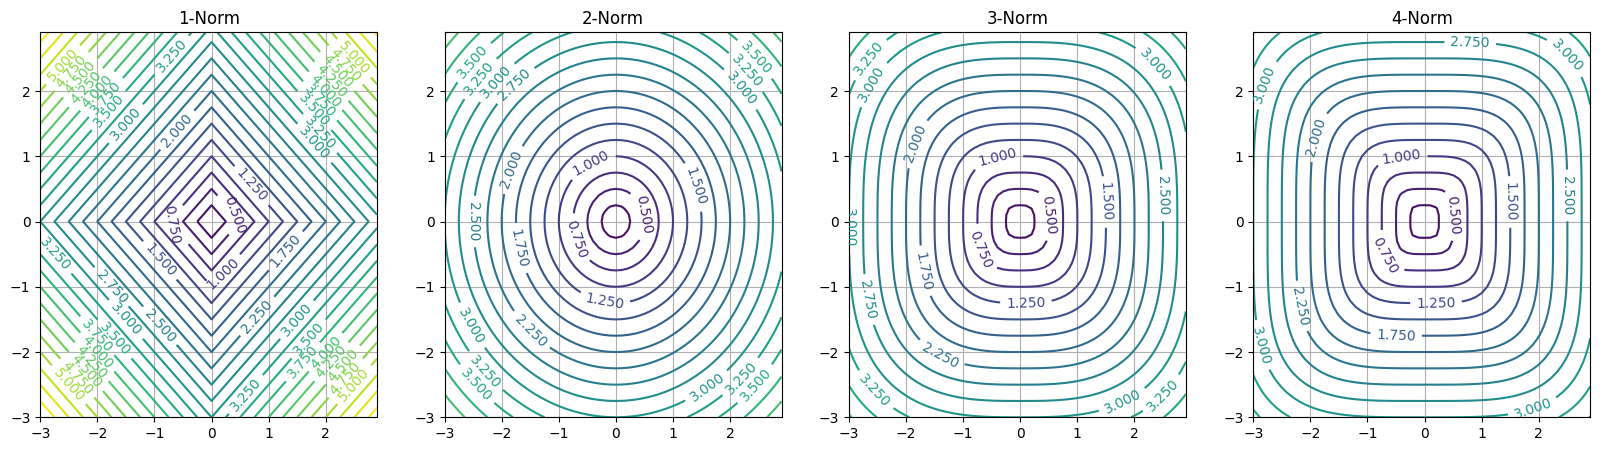

In [41]:
# Create figure with figsize=(20, 5).
plt.figure(figsize=(20,5))

# Iterate over different values of p.
for p in range(1, 5):
    plt.subplot(1, 4, p)
    plt.title('{}-Norm'.format(p))
    
    # Create PNorm object with `p=p`.
    pnorm = PNorm(p)
    
    # Plot p-norm distances.
    plot_distances(pnorm)
    
# Show figure.
plt.show()

- For the Mahalanobis distance try different values for the covariance matrix `S` and plot the distance using the method `plot_distance`. 

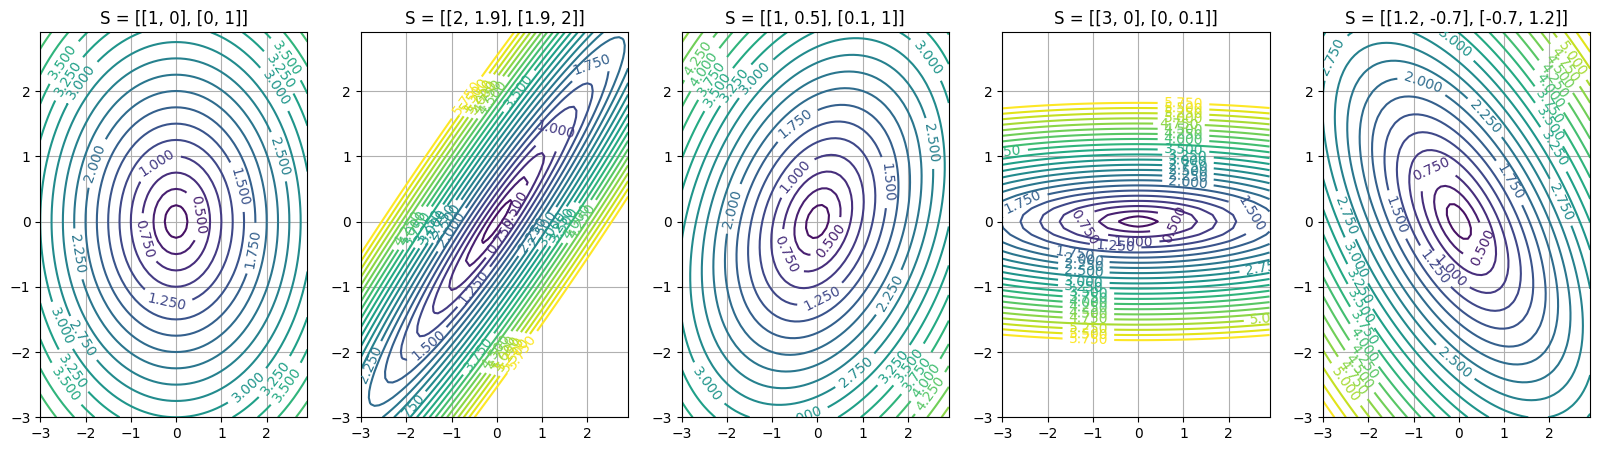

In [42]:
# Create list of covariance matrices.
all_S = [
    [[1, 0], [0, 1]],
    [[2, 1.9], [1.9, 2]],
    [[1, .5], [.1, 1]],
    [[3, 0], [0, .1]],
    [[1.2, -0.7],[-0.7, 1.2]],
]

# Create figure with figsize=(20, 5).
plt.figure(figsize=(20,5))

# Iterate over all covariance matrices.
for i, s in enumerate(all_S):
    plt.subplot(1, len(all_S), i+1)
    plt.title('S = {}'.format(s))
    
    # Create Mahalanobis distance object with `S=S`.
    mah = Mahalanobis(s)
    
    # Plot Mahalanobis distances.
    plot_distances(mah)
# Show figure.
plt.show()

### **4. Optimization with SciPy** <a class="anchor" id="scipy"></a>

As mentioned, SciPy offers several modules for scientific computing. One central module is `optimization`. In this section, we will show a use-case of this module by applying one of its optimization algorithms to minimize the so-called [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function). Here, we will consider a special parametrization of it:

\begin{equation}
    f(\mathbf{x}) = f((x_0, x_1)^\mathrm{T}) = (1 - x_0)^2 + 100(x_1 - x_0^2)^2,
\end{equation}

whose minimum value of zero is given by 

\begin{equation}
\mathbf{x}^* = \text{arg min}_{\mathbf{x} \in \mathbb{R^2}}(f(\mathbf{x})) = \begin{bmatrix} 1 \\ 1 \end{bmatrix}. 
\end{equation}

In a first step, we will implement this function and visualize it through a contour plot.

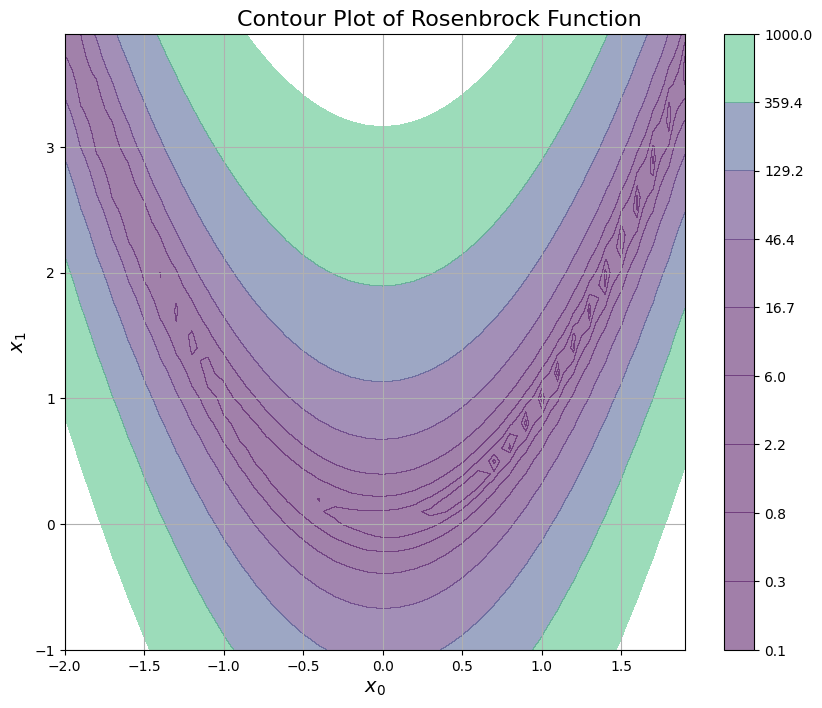

In [44]:
def rosenbrock(x):
    """
    Evaluates the Rosenbrock function [1] for a given vector `x`.
    
    Parameters
    ----------
    x : array-like, shape (2)
        The coordinates at which the Rosenbrock function is
        to be evaluated.
        
    Returns
    -------
    f_x : float
        Evaluation of Rosenbrock function, i.e, `f_x = f(x)`.
        
    References
    ----------
    [1] https://en.wikipedia.org/wiki/Rosenbrock_function
    """
    return (1-x[0])**2 + 100 * (x[1] - x[0]**2)**2
    
def plot_contours(func):
    """
    Plot level contours of given function `func`.

    Parameters
    ----------
    func : callabel with (x0, x1) -> f_x 
        A function taking two values `x0` and `x1`
        and returning a numeric value `f_x`.
    """
    # Create mesh grid.
    x, y = np.mgrid[-2:2:0.1, -1:4:0.1]
    #print(x)
    #print(y)
    
    # Evaluate function on mesh grid.
    z = rosenbrock([x,y])
    
    # Contour plot
    CS = plt.contourf(x, y, z, levels=np.logspace(-1, 3, 10), alpha=0.5)
    plt.colorbar(CS)
    plt.xlabel('$x_0$', fontsize=14)
    plt.ylabel('$x_1$', fontsize=14)
    plt.grid(True)

plt.figure(figsize=(10, 8))
plt.suptitle('Contour Plot of Rosenbrock Function', y=0.91, fontsize=16)
plot_contours(func=rosenbrock)
plt.show()

We want to determine its minimum through the use of the function `scipy.optimize.minimize` in combination with the [Newton conjugate gradient method](https://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method) as optimization algorithm. Therefor, we determine the gradient and the Hessian matrix of the Rosenbrock function:

the gradient is computed according to

\begin{equation}
\boldsymbol{\nabla}f(\mathbf{x}) = \begin{bmatrix} -400x_0x_1 + 400x_0^3 +  2x_0 -2 \\ 200x_1 - 200x_0^2 \end{bmatrix},
\end{equation}

-   and the Hessian matrix is computed according to

\begin{equation}
    \boldsymbol{\nabla}^2f(\mathbf{x})= \begin{bmatrix} -400x_1 + 1200x_0^2 +  2 & -400x_0 \\ -400x_0 & 200 \end{bmatrix}.
\end{equation}
    
-   Both are to be implemented as functions below.

In [45]:
def grad_rosenbrock(x) -> np.array:
    """
    Evaluates the gradient of the Rosenbrock function [1] 
    for given vector `x`.
    
    Parameters
    ----------
    x : array-like, shape (2)
        The coordinates at which the gradient of the 
        Rosenbrock function is to be evaluated.
        
    Returns
    -------
    grad : ndarray, shape (2)
        Gradient of Rosenbrock function, i.e, `grad = f'(x)`.
        
    References
    ----------
    [1] https://en.wikipedia.org/wiki/Rosenbrock_function
    """
    return np.array([-400 * x[0] * x[1] + 400 * x[0] ** 3 + 2 * x[0] -2, 200 * x[1] - 200 * x[0] ** 2])

def hessian_rosenbrock(x) -> np.array:
    """
    Evaluates the Hessian matrix of Rosenbrock function [1] 
    for given vector `x`.
    
    Parameters
    ----------
    x : array-like, shape (2)
        The coordinates at which the Hessian matrix of the 
        Rosenbrock function is to be evaluated.
        
    Returns
    -------
    H : ndarray, shape (2, 2)
        Hessian matrix of Rosenbrock function, i.e, `H = f''(x)`.
        
    References
    ----------
    [1] https://en.wikipedia.org/wiki/Rosenbrock_function
    """
    return np.array([[-400 * x[1] + 1200 * x[0] ** 2 + 2, -400 * x[0]], [-400 * x[0], 200]])


Now, we have almost all ingredients to perform the optimization with the help of `scipy.optimize.minimize`. The only missing ingredient is a starting point, which we define as 

\begin{equation}
\mathbf{x}_0 = \begin{bmatrix} -1 \\ 3 \end{bmatrix}.
\end{equation}

In [48]:
# Define starting point.
x0 = np.array([-1, 3])

# Execute minimization.
res = scipy.optimize.minimize(fun=rosenbrock, x0=x0, jac=grad_rosenbrock, 
                              hess=hessian_rosenbrock, method='Newton-CG', 
                              options={'return_all': True})
#print(res)
# Determine interim solutions. You may look up documentation ????????????????????????????????????????????????????????????????????
# of `scipy.optimize.minimize` and the method `Newton-CG`. 
interim_solutions = res.allvecs

# Get final solution for minimum.
x_final = res.x

# Plot Rosenbrock function with interim solutions found by Newton-CG.
plt.figure(figsize=(10, 8))
title = 'Newton-CG of Rosenbrock Function with Solution: $\mathbf{x}^*=('\
        + str(round(x_final[0], 4)) + ',' + str(round(x_final[1], 4)) + ')^\mathrm{T}$'
plt.suptitle(title, y=0.92, fontsize=16)
plot_contours(func=rosenbrock)
anglesx0 = interim_solutions[1:, 0] - interim_solutions[:-1, 0]
anglesx1 = interim_solutions[1:, 1] - interim_solutions[:-1, 1]
plt.scatter(interim_solutions[:, 0], interim_solutions[:, 1], marker='x', color='r')
plt.quiver(interim_solutions[:-1, 0], interim_solutions[:-1, 1], anglesx0, anglesx1, 
           scale_units='xy', angles='xy', scale=1, color='r')
plt.show()

TypeError: list indices must be integers or slices, not tuple

### **5. Classification with Scikit-learn** <a class="anchor" id="scikit-learn"></a>

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. 
You can find detailed information in the corresponding [user guide](https://scikit-learn.org/stable/user_guide.html).

In this brief tutorial, we provide an example for fitting a logistic regression model as classifier on a simple data set.
In the first step, we load a data set, which consists of handwritten images in our case.

In [49]:
from sklearn.datasets import load_digits
digits = load_digits()

# Normalize data to range 0 to 1.
digits.data /= 255

In the second step, we explor the dimensions of this data set by printing the number of images and the number of pixels in each image.

In [50]:
print(type(digits))
print(digits.keys())
print(len(digits["images"]))
print(digits["images"].shape[0])
print(digits["images"].shape[1:])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
1797
1797
(8, 8)


In the third step, we investigate the classes of the data set. Therefor, we plot the set of class labels.

In [51]:
print(digits["target_names"])

[0 1 2 3 4 5 6 7 8 9]


To get a better intuition, we visualize the data sets by plotting the 8x8 images of several digits.

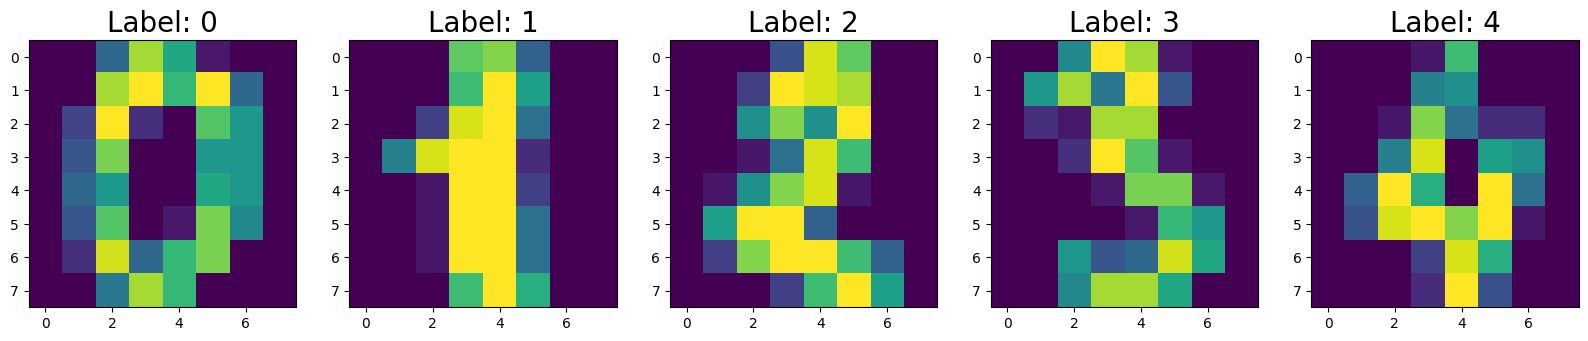

In [52]:
plt.figure(figsize=(20 ,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    
    # Reshape image to 8x8 array.?????????
    # TODO
    
    # Use `imshow` to visualize the image.
    plt.imshow(digits["images"][index])
    
    plt.title(f'Label: {label}', fontsize=20)

To obtain a reasonable accuracy estimate for our classifier, we split the dataset into 80% train and 20% test data.

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.2, train_size=.8)

Finally, we use the `scikit-learn` four-step modeling pattern.

1. Import desired classification model.

In [54]:
# 1. Import logistic regression model.
from sklearn.linear_model import LogisticRegression

2. Create object of the classification model.

In [55]:
# 2. Create an object of the logistic regression model.
logreg = LogisticRegression()

3. Train the classification model on the train data.

In [56]:
# 3. Train the logistic regression model on the 80% digit train set.
logreg.fit(x_train, y_train)

LogisticRegression()

4. Evaluate trained classification model on the test data.

0.9083333333333333


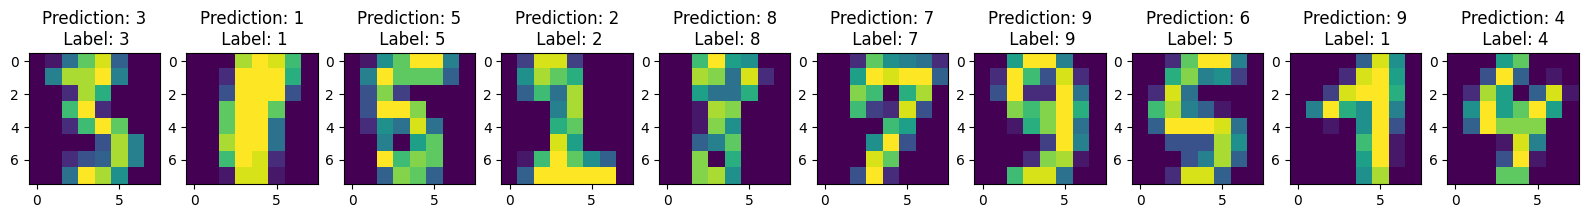

In [57]:
# 4. Evaluate the logistic regression model on the 20% digit test data. 

# Predict labels for the test data.
y_pred = logreg.predict(x_test)

# Print accuracy on test data.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Print predictions and true class labels for the first ten test images.
plt.figure(figsize=(20, 4))
for index, (image, pred, label) in enumerate(zip(x_test[0:10], y_pred[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    
    # Reshape image to 8x8 array.
    image = image.reshape(8,-1)
    
    # Use `imshow` to visualize the image.
    plt.imshow(image)
    
    plt.title('Prediction: {}\n Label: {}'.format(pred, label), fontsize=12)

### **6. Version Control via Git** <a class="anchor" id="git"></a>
Git is easy to learn and has a tiny footprint with lightning-fast performance.

To use it, you need to install it on your machine according the [installation guide](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git).

As a platform, we recommend [GitHub](https://github.com/), where you can create your own account. If you have an account, you can upload this project to GitHub as a repository to control and manage your implementations.
This project should be a private one. Otherwise, your repository will be publicly available on the Internet. 

This [guide](https://guides.github.com/activities/hello-world/) can help you to set up your repository on GitHub.